<a href="https://colab.research.google.com/github/men-ka/data-science-111/blob/main/day14_categoricalEncodingTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

In [31]:
df.columns = [col.lower() for col in df.columns]
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
print(df.isnull().sum())

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [33]:
df['age'] = df['age'].fillna(df['age'].mean()) #filling missing values with mean
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) #with mode
df['has_cabin'] = df['cabin'].notnull().astype(int) #new column,empty values with 0(no cabin)
df = df.drop(columns=['cabin'])

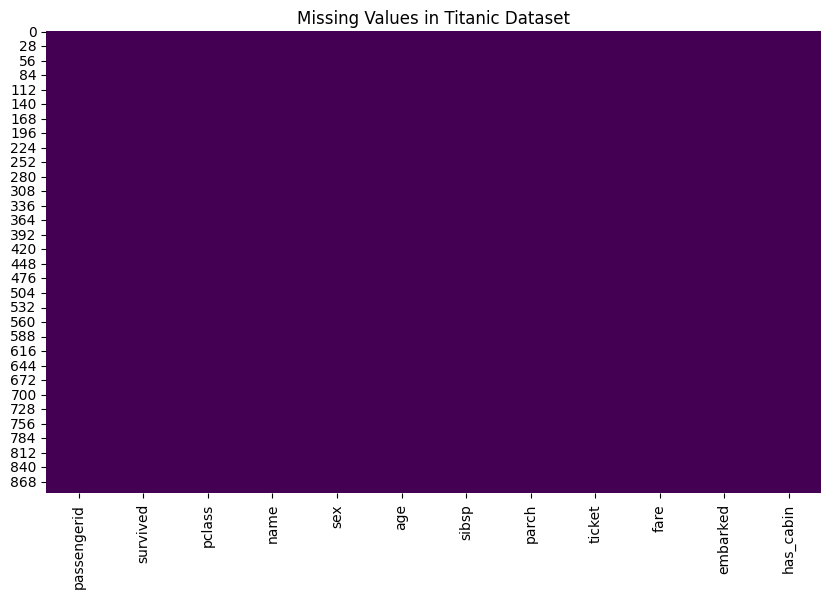

In [34]:
#visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

In [35]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 #making new column family size by combining Siblings/spouses and Parent children

In [36]:
df['is_alone'] = (df['family_size'] == 1).astype(int) #checking for loners

In [37]:
df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [38]:
print(df.groupby('is_alone')['survived'].mean()) #grouping by the new features
print(df.groupby('title')['survived'].mean())

is_alone
0    0.505650
1    0.303538
Name: survived, dtype: float64
title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: survived, dtype: float64


In [39]:
print("Before:", df.shape) #before encoding

Before: (891, 15)


In [40]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [41]:
df = pd.get_dummies(df, columns=['embarked', 'title'], drop_first=True)

In [42]:
print(df.head())

   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name  sex   age  sibsp  parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             ticket     fare  ...  title_Major  title_Master  title_Miss  \
0         A/5 21171   7.2500  ...        False         False       False   
1          PC 17599  71.2833  ...        False         False       False   
2  STON/O2. 3101282   7.9250  ...        False         False        

In [43]:
print("After:", df.shape)

After: (891, 31)
